# Лінійна фільтрація

### Завдання

Реалізуйте функцію для зчитування зображення з файлу та його відображення за допомогою бібліотеки **OpenCV**.

Реалізуйте фільтр Собеля для зображення та відобразіть його результат.

Реалізуйте медіанний фільтр для зображення та відобразіть його результат.

Порівняйте результати фільтрів Собеля та медіанного фільтру та проілюструйте їх відмінності на зображенні.

## Розв'язок

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
warnings.filterwarnings("ignore")

### Функція для зчитування зображення з файлу та його відображення на екрані

In [74]:
# Функція для завантаження зображеня і відображення на екрані
def load_show(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.axis('off')
    plt.show
    return img

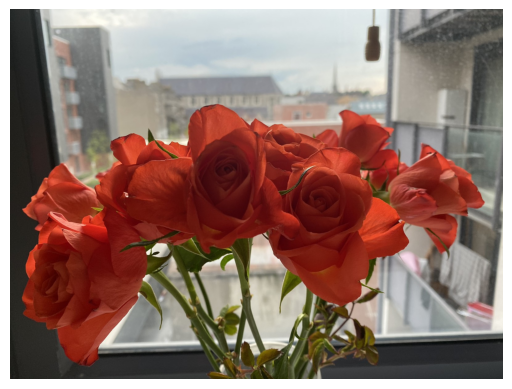

In [75]:
image = load_show('flowers1.jpg')

### Фільтр Собеля для зображення

In [76]:
# cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])

- src: Вхідне зображення, для якого обчислюється градієнт. Це може бути зображення в будь-якому форматі, що підтримується бібліотекою OpenCV.

- ddepth: Глибина вихідного зображення. Значення можуть бути cv2.CV_8U, cv2.CV_16U, cv2.CV_16S, cv2.CV_32F або cv2.CV_64F.

- dx та dy: Порядок похідної, який буде обчислюватися. dx вказує на порядок похідної відносно x, тоді як dy вказує на порядок похідної відносно y. Дозволені значення - 0, 1, 2 і 3.

- dst: Вихідне зображення з обчисленим градієнтом. Це може бути те ж саме зображення, що і вхідне, або нове зображення.

- ksize: Розмір ядра фільтра, що використовується для обчислення градієнту. За замовчуванням використовується значення 3, але можливі інші значення, такі як 1, 5, 7, 9 тощо. Розмір ядра повинен бути непарним числом.

- scale: Масштабний коефіцієнт, який застосовується до результуючого зображення. За замовчуванням масштабний коефіцієнт дорівнює 1.

- delta: Зміщення, що застосовується до результуючого зображення

### dy = 0

In [77]:
sobel_1 = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobel_12 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


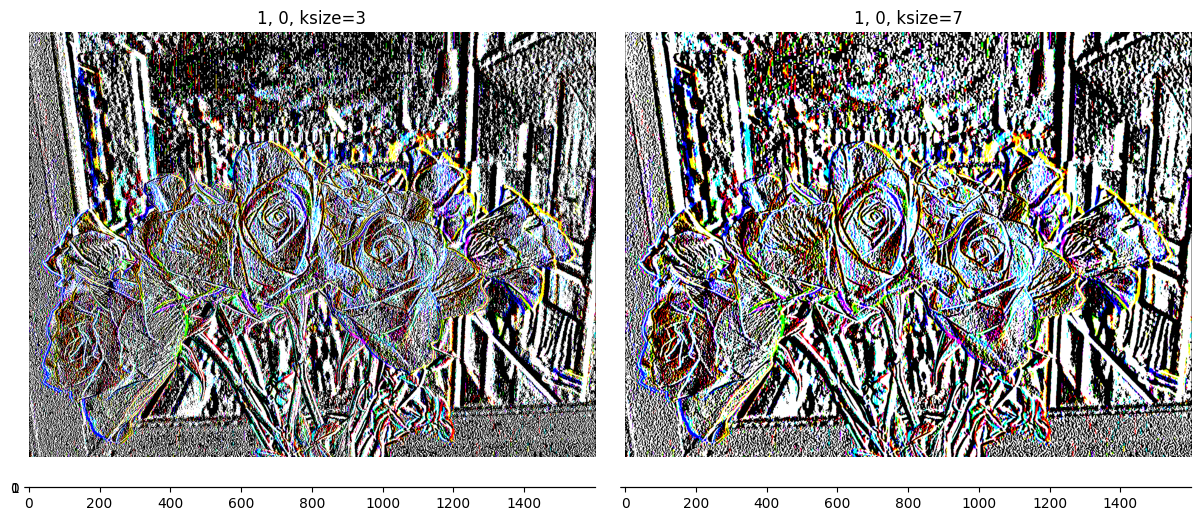

In [78]:
# Порівнюємо зображення

list_images = [sobel_1, sobel_12]

# Візуалізація

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),  # сітка 2 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['1, 0, ksize=3', '1, 0, ksize=7']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### dx = 0

In [79]:
sobel_2 = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobel_21 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


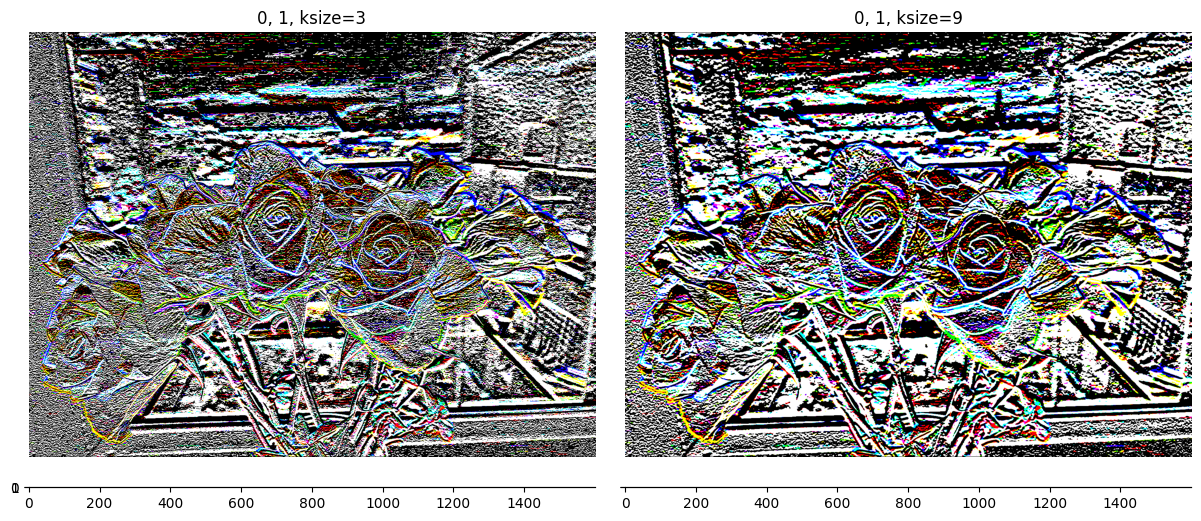

In [80]:
# Порівнюємо зображення
list_images = [sobel_2, sobel_21]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),  # сітка 2 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['0, 1, ksize=3', '0, 1, ksize=9']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### Медіанний фільтр для зображення

In [81]:
# cv2.medianBlur(src, ksize[, dst])

- src: Вхідне зображення. Може бути будь-якого типу та розміру.

- ksize: Розмір фільтра. Має бути непарним числом.

- dst: Вихідне зображення. Якщо цей параметр не вказано, то функція створює вихідне зображення автоматично.

In [82]:
median_3  = cv2.medianBlur(image,3)
median_7  = cv2.medianBlur(image,7)
median_11  = cv2.medianBlur(image,11)
median_15  = cv2.medianBlur(image,15)

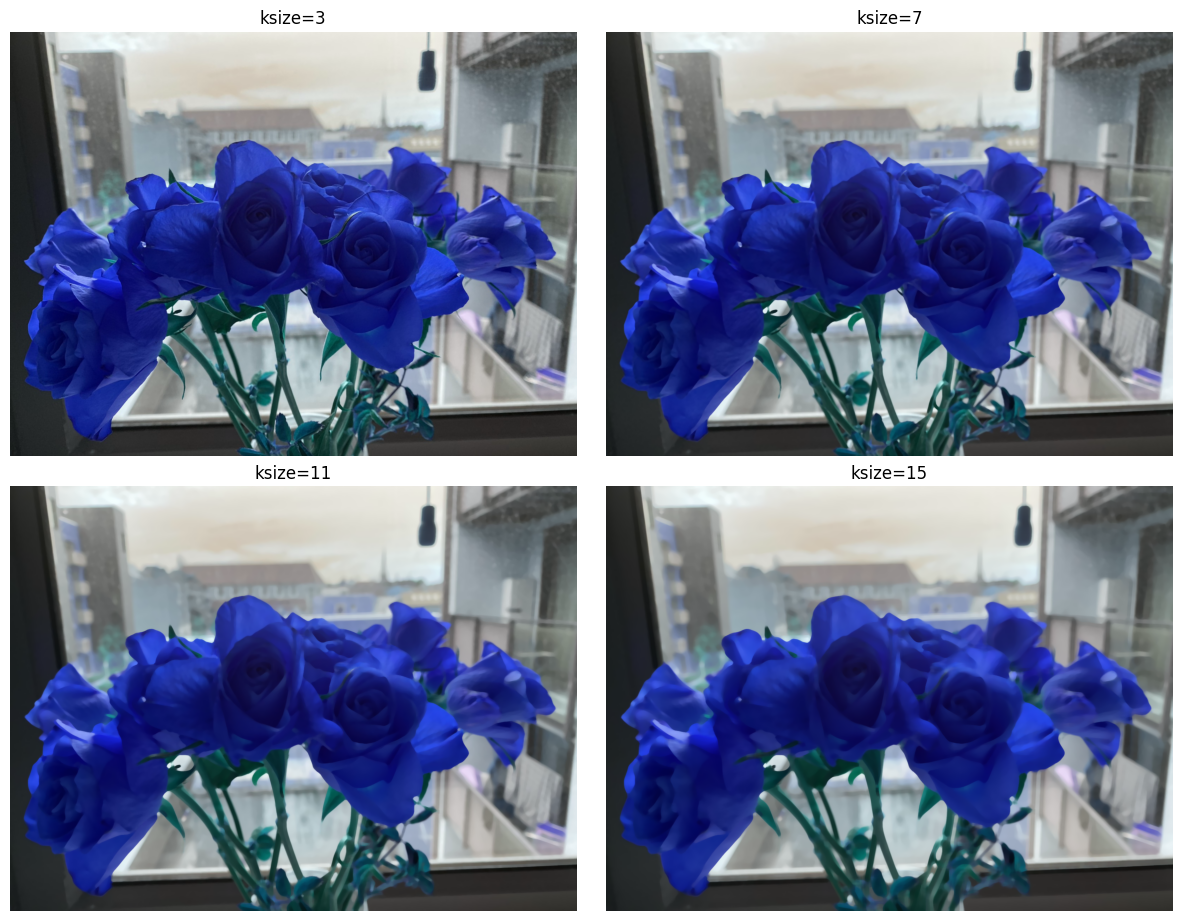

In [83]:
# Порівнюємо зображення
list_images = [median_3, median_7, median_11, median_15]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),  # сітка 2 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['ksize=3', 'ksize=7', 'ksize=11', 'ksize=15']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### Порівняння зображень

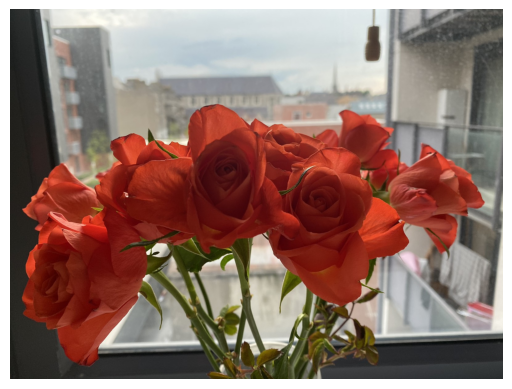

In [84]:
image = load_show('flowers1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


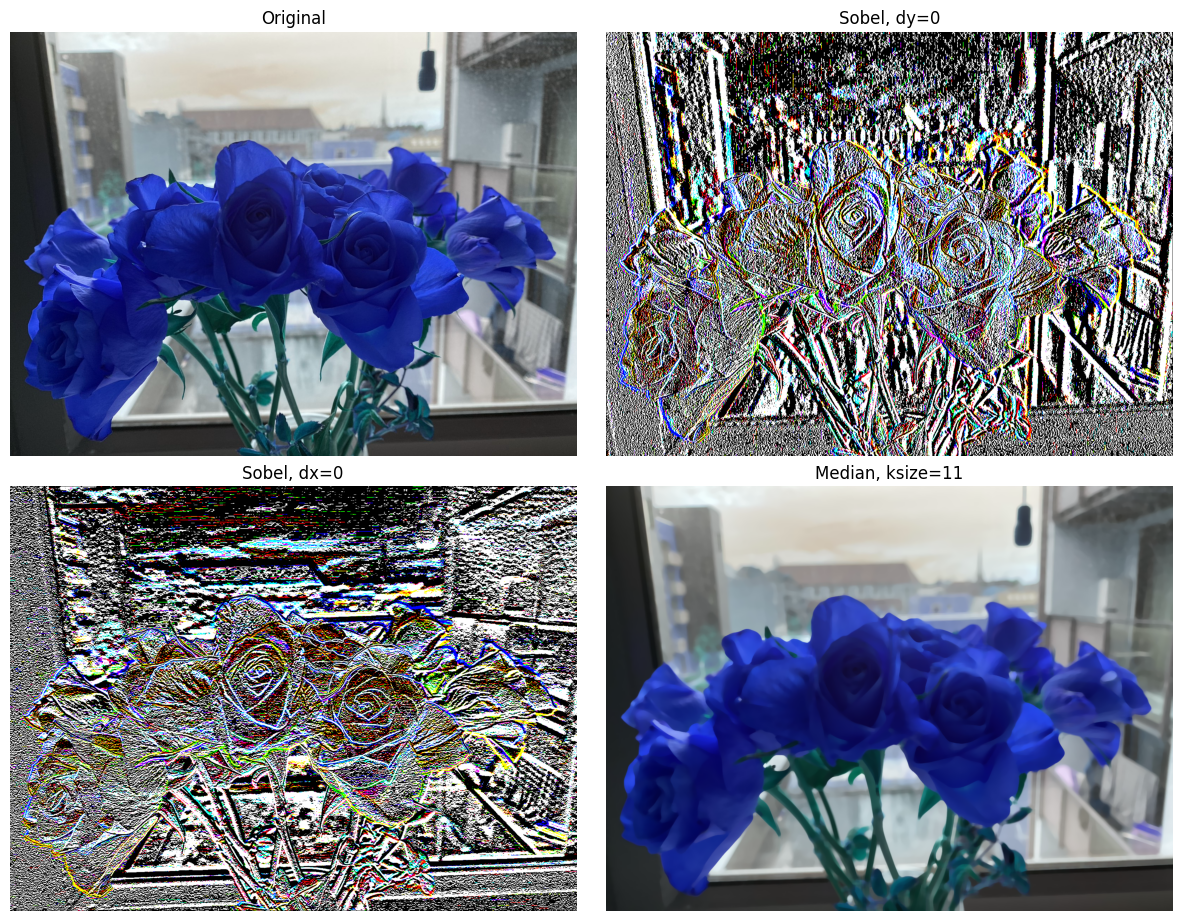

In [85]:
# Порівнюємо зображення
list_images = [image, sobel_1, sobel_2, median_15]

# Візуалізація
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),  # сітка 2 на 2
                 axes_pad=0.3  # відстань між рисунками
                 )
# Підписи
titles = ['Original', 'Sobel, dy=0', 'Sobel, dx=0', 'Median, ksize=11']

for ax, im, titles in zip(grid, list_images, titles):
    # Ітерація по сітці
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

## Висновок

**Застосування фільтра Собеля змінює зображення на таке, в якому елементи виглядають більш рельєфно.**

**При чому, коли параметр dy = 0 - чіткі складові по вертикалі, а коли dx = 0 - чіткі складові по горизонталі.**

**Застосування медіанного фільтру "розмиває" зображення. Чим більше значення параметру ksize, тим більш розмите зображення отримуємо.**